In [139]:
from pandas import read_csv
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame

from dateutil.parser import parse
from math import sqrt

import matplotlib
from matplotlib import pyplot
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_squared_error

In [140]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [141]:
series = read_csv('../datasets/data.csv')
arima_series  = read_csv('../datasets/data.csv', header=0, parse_dates=[0], index_col=0, squeeze=0)
#header=0, parse_dates=[0], index_col=0, squeeze=0

#### 1 ==> transport
#### 2 ==> ploughing
#### 3 ==> ploughing & transport 

In [142]:
print(series.head(10))

                           date  work  income
0  Thursday, September 30, 2021     2    2100
1      Sunday, October 03, 2021     1    3600
2      Monday, October 04, 2021     1    4000
3     Tuesday, October 05, 2021     1    7900
4   Wednesday, October 06, 2021     1    7500
5    Thursday, October 07, 2021     1   10600
6      Friday, October 08, 2021     1    6700
7    Saturday, October 09, 2021     3    5800
8      Sunday, October 10, 2021     1    6800
9      Monday, October 11, 2021     3    8000


In [143]:
series.columns

Index(['date', 'work', 'income'], dtype='object')

In [144]:
series['date'] = pd.to_datetime(series['date'])

In [145]:
series.head()

,date,work,income
0,2021-09-30,2,2100
1,2021-10-03,1,3600
2,2021-10-04,1,4000
3,2021-10-05,1,7900
4,2021-10-06,1,7500


In [146]:
series_1 = series.copy()

In [147]:
series['Year'] = series['date'].dt.year
series['Month'] = series['date'].dt.month
series['Date'] = series['date'].dt.day
#series['Hour'] = series['date'].dt.hour
series['Day'] = series.date.dt.strftime("%A")

series.head()

,date,work,income,Year,Month,Date,Day
0,2021-09-30,2,2100,2021,9,30,Thursday
1,2021-10-03,1,3600,2021,10,3,Sunday
2,2021-10-04,1,4000,2021,10,4,Monday
3,2021-10-05,1,7900,2021,10,5,Tuesday
4,2021-10-06,1,7500,2021,10,6,Wednesday


In [148]:
series.tail()

,date,work,income,Year,Month,Date,Day
187,2022-07-04,1,12600,2022,7,4,Monday
188,2022-07-05,1,10300,2022,7,5,Tuesday
189,2022-07-06,1,10000,2022,7,6,Wednesday
190,2022-07-07,2,12500,2022,7,7,Thursday
191,2022-07-08,1,2000,2022,7,8,Friday


In [153]:
colors = ['green', 'red', 'blue']

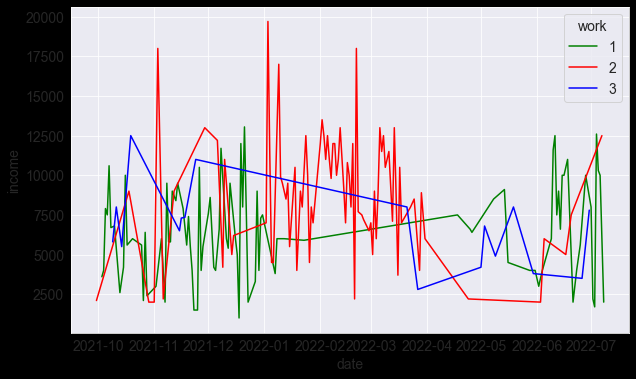

In [154]:
t_series = sns.lineplot(x=series['date'], y='income', data=series, hue='work', palette=colors)

#### 1 ==> transport
#### 2 ==> ploughing
#### 3 ==> ploughing & transport 

In [44]:
series.columns

Index(['date', 'work', 'income', 'Year', 'Month', 'Date', 'Day'], dtype='object')

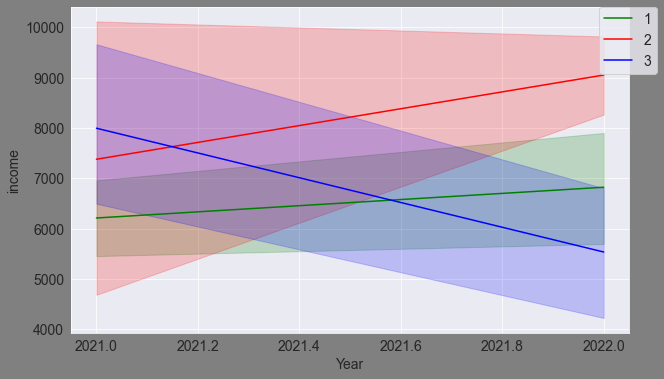

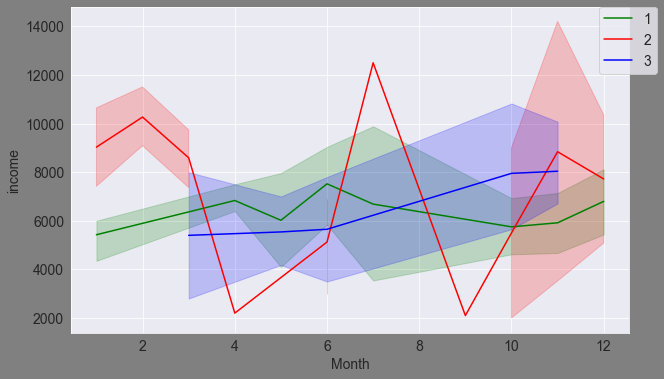

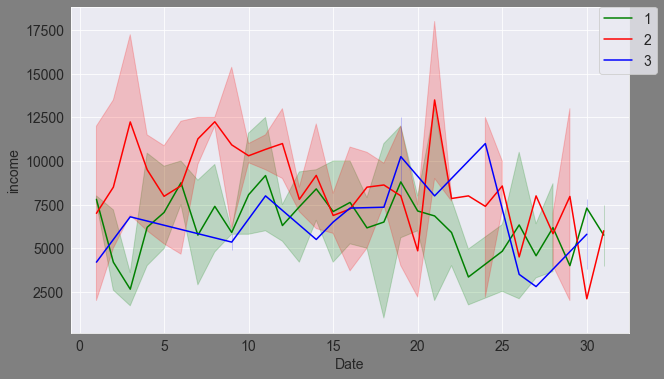

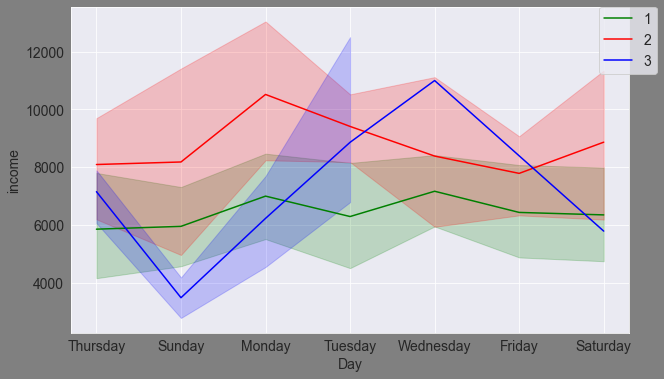

In [155]:
n_features = ['Year', 'Month', 'Date', 'Day']

for i in n_features:
    pyplot.figure(figsize=(10,6), facecolor="#808080")
    ax = sns.lineplot(x=series[i], y='income', data=series, hue='work', palette=colors)
    
    pyplot.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    
    #### 1 ==> transport
    #### 2 ==> ploughing
    #### 3 ==> ploughing & transport 

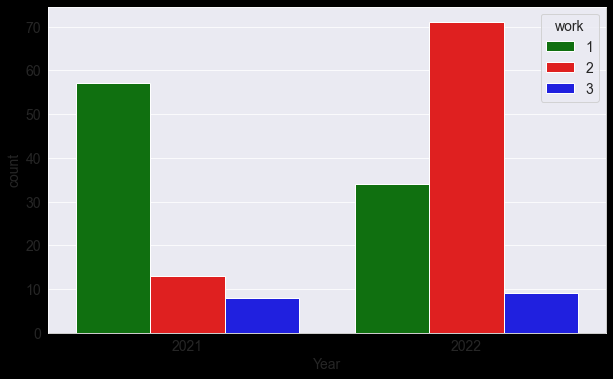

In [156]:
count = sns.countplot(data=series, x=series['Year'], hue='work', palette=colors)

#### 1 ==> transport
#### 2 ==> ploughing
#### 3 ==> ploughing & transport 

<AxesSubplot:>

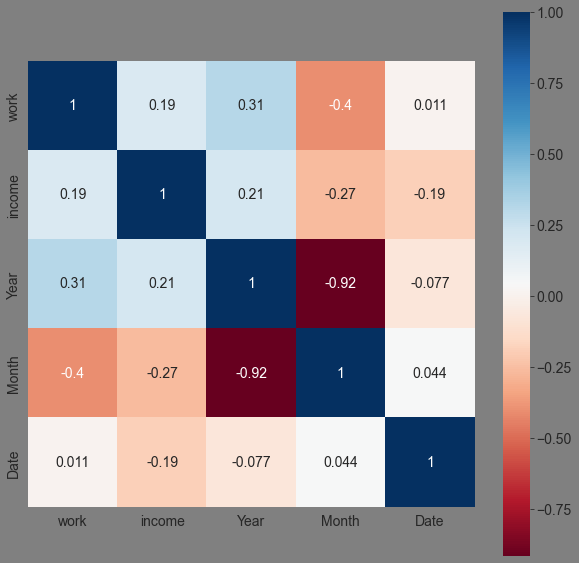

In [157]:
corrmat = series.corr()

pyplot.subplots(figsize=(10,10), facecolor='#808080')
sns.heatmap(corrmat, cmap='RdBu', annot=True, square=True)

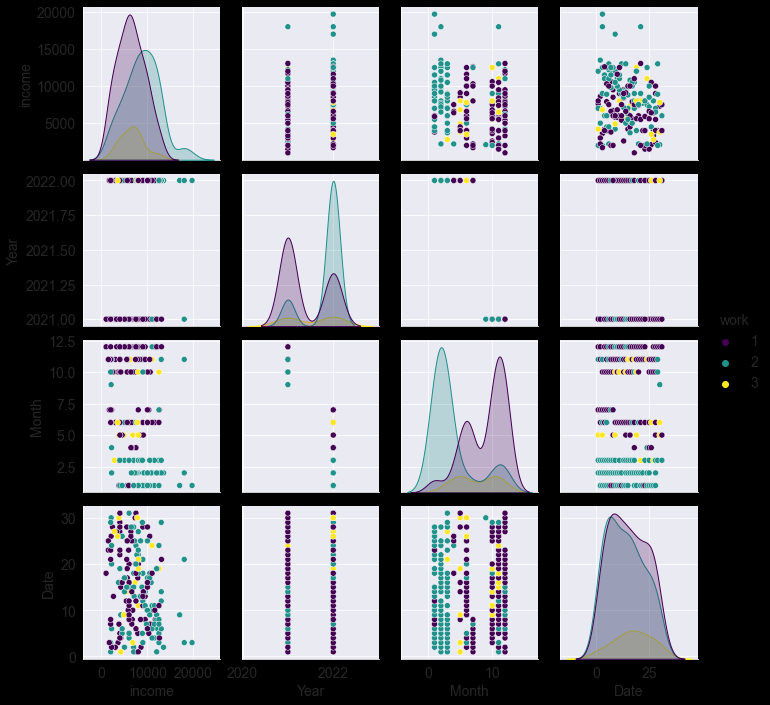

In [55]:
sns.pairplot(data=series, hue='work', palette='viridis')

#### 1 ==> transport
#### 2 ==> ploughing
#### 3 ==> ploughing & transport 

In [159]:
work_series = series_1.pivot(columns='work', index="date")

work_series.describe()

#### 1 ==> transport
#### 2 ==> ploughing
#### 3 ==> ploughing & transport 

income                            
work              1             2             3
count     91.000000     84.000000     17.000000
mean    6437.912088   8791.666667   6691.176471
std     2974.916812   3822.041602   2559.799510
min     1000.000000   2000.000000   2800.000000
25%     4000.000000   6150.000000   4900.000000
50%     6000.000000   8950.000000   6800.000000
75%     8550.000000  11500.000000   8000.000000
max    13050.000000  19700.000000  12500.000000

In [160]:
#### 1 ==> transport
#### 2 ==> ploughing
#### 3 ==> ploughing & transport 

df_1 = work_series[[('income', 1)]]
df_2 = work_series[[('income', 2)]]
df_3 = work_series[[('income', 3)]]


df_3 = df_3.dropna()

In [161]:
list_df = [df_1, df_2, df_3]

for i in list_df:
    i.columns = i.columns.droplevel(level=1)

    def sub_plots_3(df_1, df_2, df_3, title):
        fig, axes = pyplot.subplots(3, 1, figsize=(15, 8), facecolor="#808080", sharey=True)
        fig.suptitle(title)

        plot_1 = sns.lineplot(ax=axes[0], data=df_1, color='blue')
        axes[0].set(ylabel = 'Transport')

        plot_2 = sns.lineplot(ax=axes[1], data=df_2, color='red')
        axes[1].set(ylabel='Ploughing')

        plot_3 = sns.lineplot(ax=axes[2], data=df_3, color='green')
        axes[2].set(ylabel='Transport & ploughing')


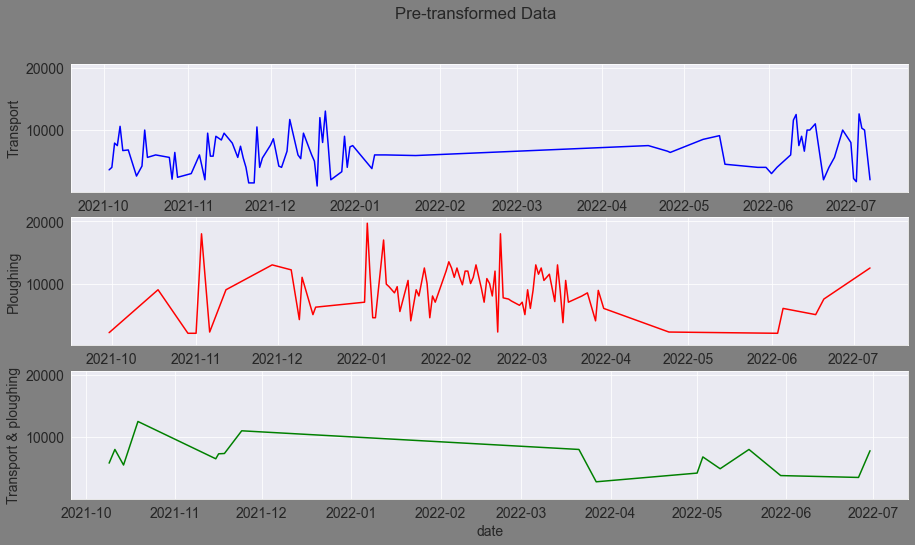

In [162]:
sub_plots_3(df_1.income, df_2.income, df_3.income, 'Pre-transformed Data')

In [163]:
#normalization
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()

    return df_normalized, average, stdev


In [164]:
# Differencing Function
def Difference(df,col, interval):
    diff = []

    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
        
    return diff

In [165]:
df_N1, av_J1, std_J1 = Normalize(df_1, "income")
Diff_1 = Difference(df_N1, col="income", interval=(24*7)) 
df_N1 = df_N1[24*7:]
df_N1.columns = ["Norm"]
df_N1["Diff"]= Diff_1

In [166]:
df_N2, av_J2, std_J2 = Normalize(df_2, "income")
Diff_2 = Difference(df_N2, col="income", interval=(24)) 
df_N2 = df_N2[24:]
df_N2.columns = ["Norm"]
df_N2["Diff"]= Diff_2

In [167]:
df_N3, av_J3, std_J3 = Normalize(df_3, "income")
Diff_3 = Difference(df_N3, col="income", interval=1) 
df_N3 = df_N3[1:]
df_N3.columns = ["Norm"]
df_N3["Diff"]= Diff_3

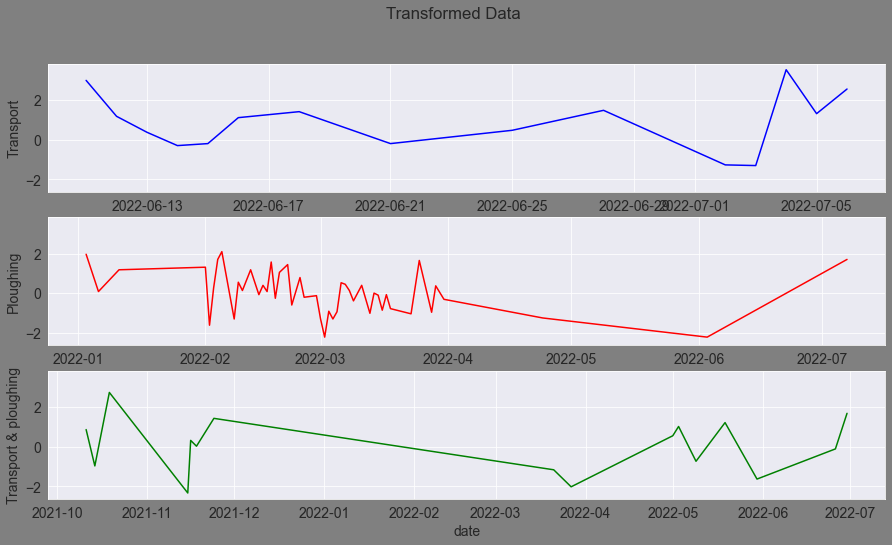

In [168]:
sub_plots_3(df_N1.Diff, df_N2.Diff,df_N3.Diff, "Transformed Data")

In [169]:
#Stationary Check for the time series - the Augmented Dickey Fuller test
def Stationary_check(df):
    check = adfuller(df.dropna())

    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")

    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Non-Stationary")
    else:
        print("Stationary") 

#Checking if the series is stationary
List_df_ND = [ df_N1["Diff"], df_N2["Diff"], df_N3["Diff"]] 
print("stationarity check:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)

stationarity check:


ADF Statistic: -3.444508263751443
p-value: 0.009531990463786198
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691
Non-Stationary


ADF Statistic: -6.348495514725851
p-value: 2.646423644385202e-08
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Stationary


ADF Statistic: -148.25635042827003
p-value: 0.0
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
Stationary


In [170]:
arima_series.columns

Index(['work', 'income'], dtype='object')

In [171]:
arima_series = arima_series.drop(columns='work')

In [172]:
arima_series.columns

Index(['income'], dtype='object')

In [173]:
arima_series.head()

,income
date,
2021-09-30,2100
2021-10-03,3600
2021-10-04,4000
2021-10-05,7900
2021-10-06,7500


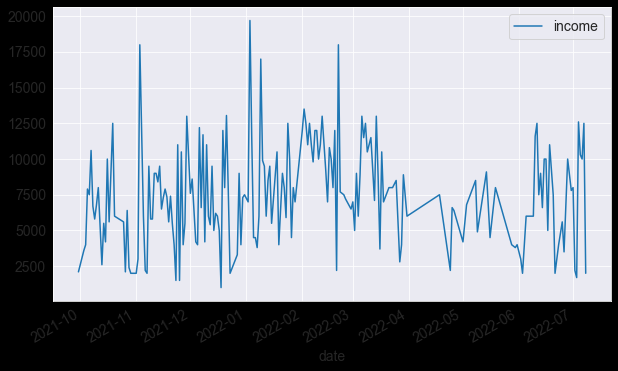

In [174]:

arima_series.plot()
pyplot.show()

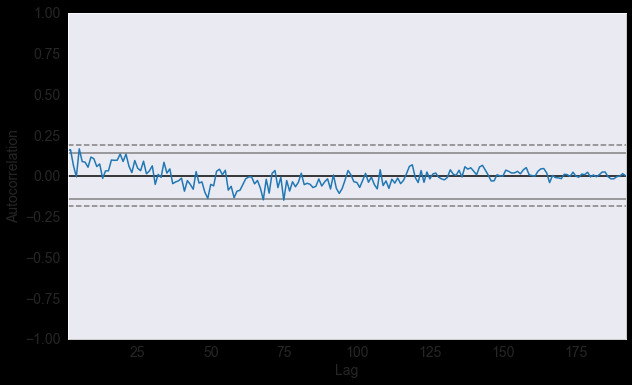

In [175]:
autocorrelation_plot(arima_series)
pyplot.show()

In [235]:
model = ARIMA(arima_series, order=(5,1,1))
model_fit = model.fit()

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when 

In [236]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 income   No. Observations:                  192
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1825.423
Date:                Sat, 24 Dec 2022   AIC                           3664.845
Time:                        22:26:28   BIC                           3687.611
Sample:                             0   HQIC                          3674.067
                                - 192                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0744      0.091      0.820      0.412      -0.104       0.252
ar.L2          0.0918      0.089      1.029      0.303      -0.083       0.267
ar.L3         -0.0363      0.091     -0.397      0.6

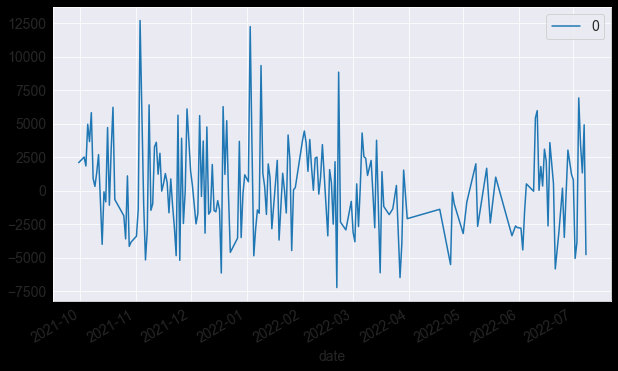

In [237]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

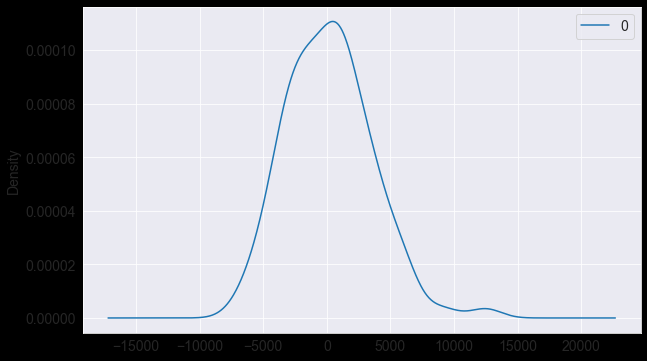

In [238]:
residuals.plot(kind = 'kde')
pyplot.show()

In [239]:
print(residuals.describe())

                  0
count    192.000000
mean     219.119236
std     3412.172324
min    -7222.126438
25%    -2450.524115
50%      132.787772
75%     2265.266715
max    12706.142048


In [231]:
X = arima_series.values
size = int(len(X) * 0.64)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [232]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predcited=%f, expected=%f' % (yhat, obs))
          

predcited=9667.209491, expected=7700.000000
predcited=10941.974117, expected=7500.000000
predcited=10072.951652, expected=7200.000000
predcited=7959.825253, expected=6500.000000
predcited=10634.620705, expected=7000.000000
predcited=9417.745514, expected=5000.000000
predcited=9080.065994, expected=9000.000000
predcited=8974.979885, expected=6000.000000
predcited=9015.852658, expected=8900.000000
predcited=8690.564937, expected=13000.000000
predcited=8892.117950, expected=11500.000000
predcited=9760.510780, expected=12500.000000
predcited=8867.512095, expected=10500.000000
predcited=8922.326298, expected=11500.000000
predcited=9466.948156, expected=7100.000000
predcited=9185.530685, expected=13000.000000
predcited=9468.098491, expected=8800.000000
predcited=9968.158690, expected=3700.000000
predcited=9190.805601, expected=10500.000000
predcited=8330.785113, expected=7000.000000
predcited=10098.354875, expected=8000.000000
predcited=9461.292550, expected=8000.000000
predcited=8443.201539

In [233]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 3187.563


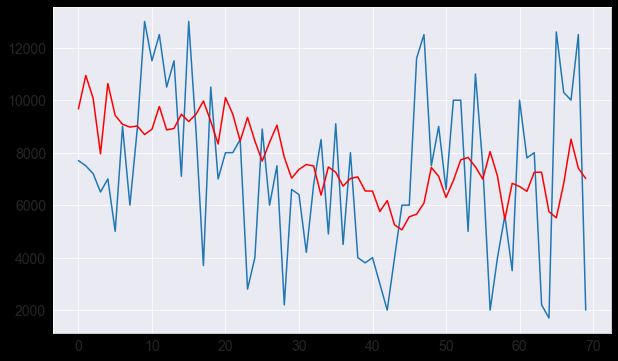

In [234]:
pyplot.plot(test)
pyplot.plot(predictions, color ='red')
pyplot.show()

     Train size |   pdq |     Score   | Rank
##### 0.66      311 ==> Test RMSE: 3226.437  =4
##### 0.68      411 ==> Test RMSE: 3237.796  =5
##### 0.66      511 ==> Test RMSE: 3221.934  =3
##### 0.64      511 ==> Test RMSE: 3187.563  =1
##### 0.62      511 ==> Test RMSE: 3402.709  =6
##### 0.65      511 ==> Test RMSE: 3198.165  =2